# Tuesday Code Challenge
## Review: Machine Learning Workflow

For today's code challenge you will be working to build a models to predict a company's available liquidity. 

Here is a link to the dataset you will be using https://github.com/pierretd/data-dump/raw/master/finance/liquidity/DS3_liquidity_data.txt

### 1. Data Exploration

Import NumPy, Pandas, Pyplot (from Matplotlib), and Seaborn

In [58]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

Import Liquidity Data.txt into a new DataFrame
Display the first 5 rows

In [59]:
df = pd.read_csv('https://raw.githubusercontent.com/pierretd/data-dump/master/finance/liquidity/DS3_liquidity_data.txt')

df.head()


,available_liquidity,sp_score,market_cap,total_debt,ltm_capex,ltm_ebitda,ltm_fcf,ltm_revenue
0,28694.04271,2,54856.1961,84628.0,-9262.0,21387.00032,9488.0,170315.0
1,24784.00051,7,209150.6401,57909.0,-2021.0,15161.00019,12105.0,37727.0
2,24142.00013,6,180108.3453,32970.0,-1817.0,15818.99981,12604.0,192592.0
3,22132.00077,9,668024.3732,3935.0,-10263.0,31217.99987,27663.0,94765.0
4,20346.00000,6,144907.9931,42168.0,-3230.0,15801.00019,12061.0,78440.0


Display the unique values in 'sp_score'

In [60]:
df['sp_score'].value_counts()

2     204
3     160
1     148
4      94
5      92
6      38
7      26
0      24
8       8
9       6
10      2
Name: sp_score, dtype: int64

### 2. Create a X and y as well as a test train split

Create your target and values to predict the target, ie X and y

In [61]:
X = df.drop(columns='available_liquidity')
y = df['available_liquidity']

Confirm that your target and inputs were created correctly


In [62]:
X.columns, y[:5]

(Index(['sp_score', 'market_cap', 'total_debt', 'ltm_capex', 'ltm_ebitda',
        'ltm_fcf', 'ltm_revenue'],
       dtype='object'), 0    28694.04271
 1    24784.00051
 2    24142.00013
 3    22132.00077
 4    20346.00000
 Name: available_liquidity, dtype: float64)

Create a train test split. Use a test size of .2 and random state 42


In [63]:
from sklearn.model_selection import train_test_split

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=.2, random_state=42)

Confirm that your train test split was created correctly


In [64]:
X_test.shape, X_train.shape, y_test.shape, y_train.shape

((641, 7), (161, 7), (641,), (161,))

Uset StandardScaler to scale the data and run a Lasso and Ridge model from sklearn
Stretch: Create a pipeline to scale and run the model simulataneously, and use a pipeline for the other models as well


In [65]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lasso = make_pipeline(StandardScaler(),
                      Lasso())

ridge = make_pipeline(StandardScaler(),
                      Ridge())


lasso.fit(X, y), ridge.fit(X, y)

(Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('lasso',
                  Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                        max_iter=1000, normalize=False, positive=False,
                        precompute=False, random_state=None, selection='cyclic',
                        tol=0.0001, warm_start=False))],
          verbose=False), Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('ridge',
                  Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                        max_iter=None, normalize=False, random_state=None,
                        solver='auto', tol=0.001))],
          verbose=False))

Run an ElasticNet model 


In [66]:
from sklearn.linear_model import ElasticNet

elastic = make_pipeline(StandardScaler(),
                      ElasticNet())


elastic.fit(X, y)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('elasticnet',
                 ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                            l1_ratio=0.5, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001,
                            warm_start=False))],
         verbose=False)

Run a RandomForestRegressor and GradientBoostingRegressor model 

In [67]:

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


random = make_pipeline(StandardScaler(),
                      RandomForestRegressor())

boost = make_pipeline(StandardScaler(),
                      GradientBoostingRegressor())


random.fit(X, y), boost.fit(X, y)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('randomforestregressor',
                  RandomForestRegressor(bootstrap=True, criterion='mse',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
          verbose=False), Pipeline(memory=None,
          steps=[('standardscaler',
                  Standar

### 3. Hyperparameter Tuning

Create a hyperparameter grid for Lasso, run the model again


In [68]:
from sklearn.model_selection import GridSearchCV

params = {'lasso__max_iter':[1000,10000,100000]}

gs_lasso = GridSearchCV(lasso, param_grid=params, scoring='r2', n_jobs=-1, cv=3, verbose=10, return_train_score=False)

#lasso.get_params().keys()
gs_lasso.fit(X, y)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:    3.4s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    3.4s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed:    3.5s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:    3.5s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:    3.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    3.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    3.5s finished
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('lasso',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
                                              precompute=False,
                                              random_state=None,
                                              selection='cyclic', tol=0.0001,
                                              warm_start=False))],
                                verbose=False),
             iid='warn', n_jobs=-1,

Create a hyperparameter grid for Ridge, run the model again


In [69]:
params = {'ridge__alpha': [10, 100, 1000]}

gs_ridge = GridSearchCV(ridge, param_grid=params, scoring='r2', n_jobs=-1, cv=3, verbose=10, return_train_score=False)

gs_ridge.fit(X, y)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:    3.1s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    3.1s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed:    3.1s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:    3.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:    3.1s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    3.1s finished
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('ridge',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                                              random_state=None, solver='auto',
                                              tol=0.001))],
                                verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'ridge__alpha': [10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             s

Create a hyperparameter grid for Elastic Net, run the model again


In [70]:
params = {'elasticnet__alpha': [10, 100, 1000]}

gs_elastic = GridSearchCV(elastic, param_grid=params, scoring='r2', n_jobs=-1, cv=3, verbose=10, return_train_score=False)

gs_elastic.fit(X, y)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:    3.0s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    3.0s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed:    3.0s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:    3.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:    3.1s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    3.1s finished
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('elasticnet',
                                        ElasticNet(alpha=1.0, copy_X=True,
                                                   fit_intercept=True,
                                                   l1_ratio=0.5, max_iter=1000,
                                                   normalize=False,
                                                   positive=False,
                                                   precompute=False,
                                                   random_state=None,
                                                   selection='cyclic',
           

Create a hyperparameter grid for Random Forest, run the model again


In [71]:
params = {'randomforestregressor__max_depth':[2, 5, 10, 20]}

gs_random = GridSearchCV(random, param_grid=params, scoring='r2', n_jobs=-1, cv=3, verbose=10, return_train_score=False)

gs_random.fit(X, y)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:    3.2s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed:    3.3s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    3.3s finished
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('randomforestregressor',
                                        RandomForestRegressor(bootstrap=True,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              min_impurity_decrease=0.0,
                                                              min_impurity_split=

Create a hyperparameter grid for Gradient Booster, run the model again

In [72]:
params = {'gradientboostingregressor__max_depth':[2, 5, 10, 20]}

gs_boost = GridSearchCV(boost, param_grid=params, scoring='r2', n_jobs=-1, cv=3, verbose=10, return_train_score=False)

gs_boost.fit(X, y)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:    3.3s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed:    3.5s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    4.0s finished
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('gradientboostingregressor',
                                        GradientBoostingRegressor(alpha=0.9,
                                                                  criterion='friedman_mse',
                                                                  init=None,
                                                                  learning_rate=0.1,
                                                                  loss='ls',
                                                                  max_depth=3,
                                                                  max_features=N

### 4. Selecting a Winning Model

Import the r-squared and mean absolute error metrics and calculate them for each of the models. Which model performed best? Why do you think that model performed best?


In [73]:
from sklearn.metrics import r2_score, mean_absolute_error

models = [gs_lasso, gs_ridge, gs_elastic, gs_random, gs_boost]

for model in models:
    r2 = r2_score(model.predict(X_test), y_test)
    mea = mean_absolute_error(model.predict(X_test), y_test)
    print(model.estimator, '\n', 'R2 Score: ', r2, '\n', 'MEA: ', mea, '\n\n')

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False) 
 R2 Score:  0.33175751060578806 
 MEA:  1733.4396878623843 


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False) 
 R2 Score:  0.3156170005160758 
 MEA:  1740.9871049688181 


Pipeline(memory=None,
         steps=[('st

Make prediction with test data

In [74]:
gs_boost.predict(X_test.sample(1))

array([1705.05771577])

Plot predictions on x axis and actuals on y axis

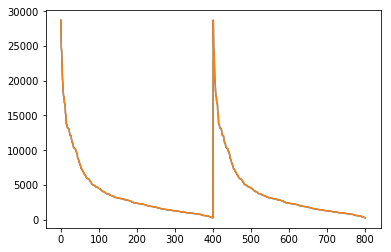

In [75]:
import matplotlib.pyplot as plt

plt.plot(df.index, y)
plt.plot(df.index, gs_boost.predict(X))

Choose one observation to make a prediction. How big was the difference between your prediction and your mean absolute error?

In [76]:
test_observation = df.sample(1)
test_observation

x = test_observation.drop(columns = 'available_liquidity')
y = test_observation['available_liquidity'].values
print('Prediction: ', gs_boost.predict(x), 'Actual: ', y, '\nDifference: ', abs(gs_boost.predict(x) - y))

Prediction:  [12119.7817756] Actual:  [12120.00051] 
Difference:  [0.2187344]
